Задача: 
Используем набор данных о пассажирах Титаника, чтобы научиться загружать данные, проводить основной анализ и манипулировать данными.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
import seaborn as sns

# Загрузка данных о пассажирах Титаника с помощью Seaborn
titanic = sns.load_dataset('titanic')

# Подсчет количества пассажиров по классам обслуживания
passenger_counts_by_class = titanic['pclass'].value_counts()

# Вывод результатов
print(passenger_counts_by_class)


pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [5]:
# Подсчет количества пассажиров по полу
passenger_counts_by_sex = titanic['sex'].value_counts()

# Вывод результатов
print(passenger_counts_by_sex)

sex
male      577
female    314
Name: count, dtype: int64


In [6]:
# Подсчет количества пассажиров по возросту 
passenger_counts_by_age = titanic['age'].value_counts()

# Вывод результатов
print(passenger_counts_by_age)

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


In [8]:
# Вычисление среднего возраста пассажиров
average_age = titanic['age'].mean()

# Вывод среднего возраста
print(f'Средний возраст пассажиров: {average_age:.1f} лет')

Средний возраст пассажиров: 29.7 лет


In [16]:
# Заполнение пропущенных значений в столбце 'age' средним возрастом
titanic['age'].fillna(average_age, inplace=True)

In [17]:
# Создание нового столбца 'is_child', где True означает, что пассажир был ребенком (< 18 лет)
titanic['is_child'] = titanic['age'].apply(lambda x: x < 18)

In [21]:
# Вывод первых нескольких строк DataFrame для проверки
print(titanic[['age', 'is_child']].head())

    age  is_child
0  22.0     False
1  38.0     False
2  26.0     False
3  35.0     False
4  35.0     False


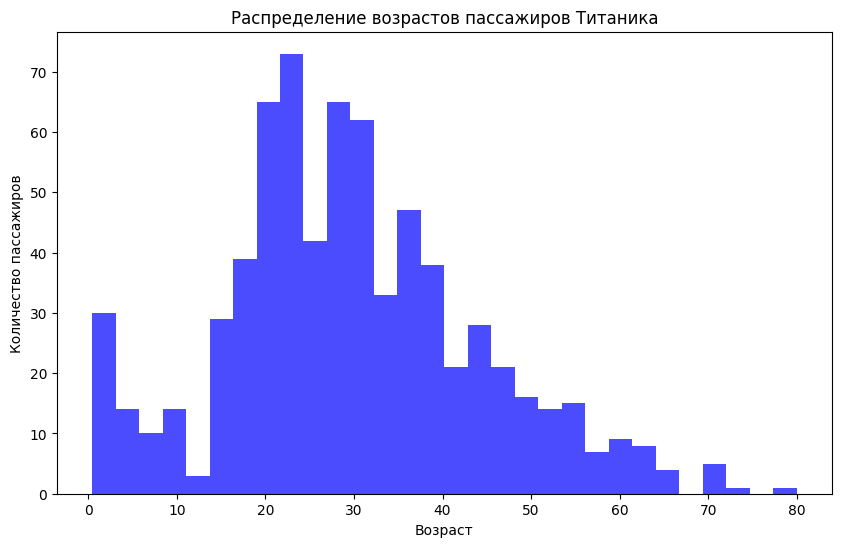

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных о пассажирах Титаника
titanic = sns.load_dataset('titanic')

# Создание гистограммы возрастов
plt.figure(figsize=(10, 6))  # Установка размера фигуры
plt.hist(titanic['age'].dropna(), bins=30, alpha=0.7, color='blue')  # Убираем NaN значения перед построением
plt.title('Распределение возрастов пассажиров Титаника')  # Добавление заголовка
plt.xlabel('Возраст')  # Подпись оси X
plt.ylabel('Количество пассажиров')  # Подпись оси Y
plt.show()

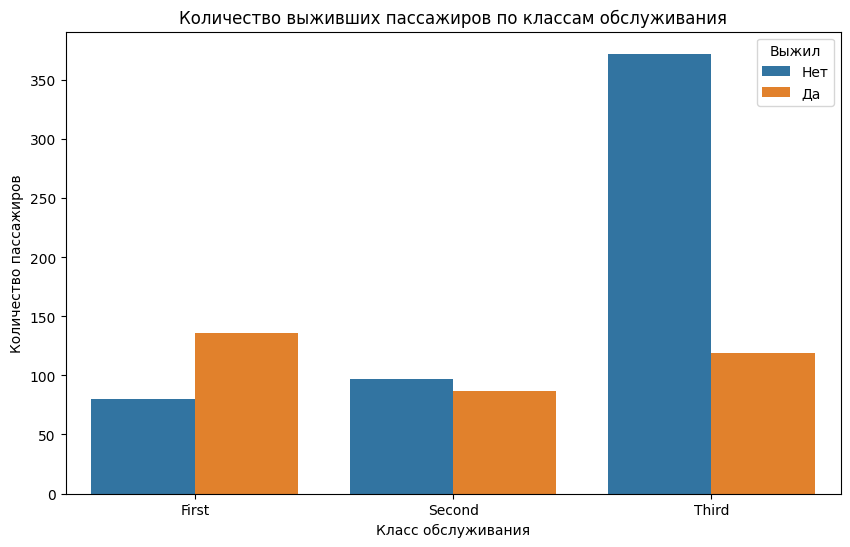

In [23]:
plt.figure(figsize=(10, 6))  # Установка размера фигуры
sns.countplot(x='class', hue='survived', data=titanic)  # class - класс обслуживания, survived - статус выживания
plt.title('Количество выживших пассажиров по классам обслуживания')  # Добавление заголовка
plt.xlabel('Класс обслуживания')  # Подпись оси X
plt.ylabel('Количество пассажиров')  # Подпись оси Y
plt.legend(title='Выжил', labels=['Нет', 'Да'])  # Добавление легенды
plt.show()

In [24]:
# Фильтрация строк, где возраст меньше 3 лет
children_under_3 = titanic[titanic['age'] < 3]

# Вывод результатов
print(children_under_3)


     survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
7           0       3    male  2.00      3      1   21.0750        S   Third   
16          0       3    male  2.00      4      1   29.1250        Q   Third   
78          1       2    male  0.83      0      2   29.0000        S  Second   
119         0       3  female  2.00      4      2   31.2750        S   Third   
164         0       3    male  1.00      4      1   39.6875        S   Third   
172         1       3  female  1.00      1      1   11.1333        S   Third   
183         1       2    male  1.00      2      1   39.0000        S  Second   
205         0       3  female  2.00      0      1   10.4625        S   Third   
297         0       1  female  2.00      1      2  151.5500        S   First   
305         1       1    male  0.92      1      2  151.5500        S   First   
340         1       2    male  2.00      1      1   26.0000        S  Second   
381         1       3  female  1.00     

In [28]:
# Подсчет количества пассажиров младше 3 лет
num_children_under_3 = (titanic['age'] < 3).sum()

# Вывод результата
print(f'Количество пассажиров младше 3 лет: {num_children_under_3}')

Количество пассажиров младше 3 лет: 24


In [29]:
sity = titanic['embark_town'].value_counts()
print(sity)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


Для построения простой модели машинного обучения, которая предсказывает выживание пассажира Титаника, мы можем использовать библиотеку Scikit-learn и логистическую регрессию в качестве алгоритма. Логистическая регрессия хорошо подходит для бинарной классификации, такой как предсказание выживет пассажир или нет (1 или 0).

Шаги для построения модели:
Шаг 1: Подготовка данных

Перед обучением модели необходимо подготовить данные. Для примера возьмем набор данных о пассажирах Титаника из Seaborn.

In [11]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [12]:
# Простая предварительная обработка
# Заполнение пропущенных значений в 'age' медианным значением возраста
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Кодирование пола в числовой формат: male=0, female=1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Выбор признаков для модели
features = ['pclass', 'sex', 'age', 'fare']
X = titanic[features]
y = titanic['survived']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np

# Замена пропущенных значений в числовых столбцах средним значением
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Применение импьютации к выбранным признакам
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# После импьютации можно создать и обучить модель
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Предсказание на тестовом наборе
predictions = model.predict(X_test_imputed)

# Оценка точности модели
accuracy = accuracy_score(y_test, predictions)
print(f'Точность модели после заполнения пропущенных значений: {accuracy:.2f}')


Точность модели после заполнения пропущенных значений: 0.80


In [ ]:
# Предполагается, что model - это ваша обученная модель логистической регрессии
# X - данные для предсказания (подготовленные аналогично данным для обучения)

predictions = model.predict(X)